# Computer Vision

It is an AI field enabling computers to "see," interpret, and understand visual information (images, videos) like humans do, using deep learning to identify objects, recognize patterns, and extract meaningful insights to perform actions.

It mimics human sight by processing pixels, detecting features (edges, shapes), and building up complex understanding through neural networks trained on massive datasets.


## 0. Computer Vision libraries in PyTorch

* `torchvision` - base library for computer vision
* `torchvision.datasets` - get datasets and data loading functions
* `torchvision.models` - get pretrained computer vision models thaat can be leveraged for own problems
* `torchvision.transforms` - functions for manipulating vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class
* `torch.utils.data.DataLoader` - creates Python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.1+cu130
0.24.1+cu130


## 1. Getting a dataset

Dataset used: Fashion-MNIST

In [2]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None # how to transform labels/target
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None # how to transform labels/target
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, train_data.classes[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

### 1.2 Visualizing the data

Text(0.5, 1.0, 'Ankle boot')

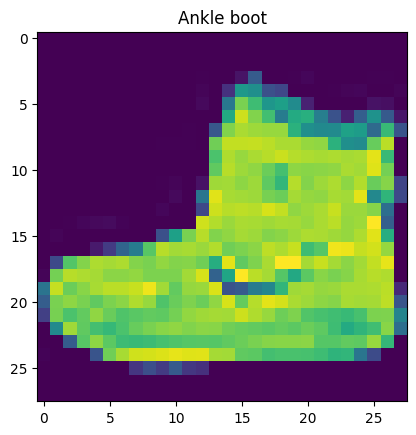

In [9]:
image, label = train_data[0]
plt.imshow(torch.permute(image, dims=(1, 2, 0)))
# since image is grayscale, image.squeeze() would also work
plt.title(train_data.classes[label])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

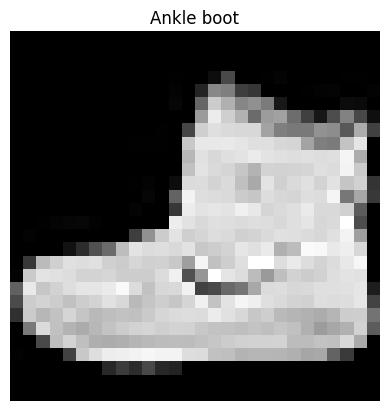

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(train_data.classes[label])
plt.axis(False)

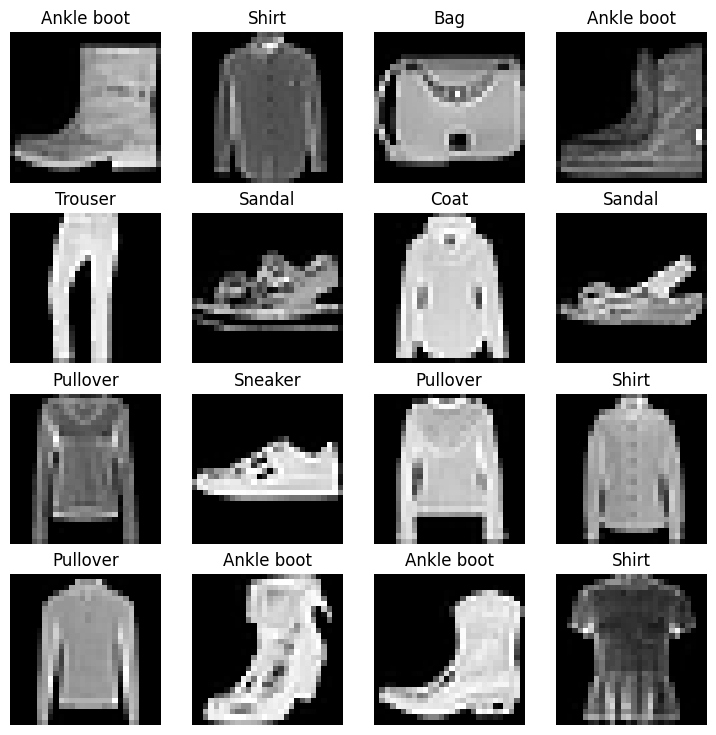

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    plt.subplot(rows, cols, i) # or fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(train_data.classes[label])
    plt.axis(False)

## 2. Prepare DataLoader

Currently, data is a PyTorch Dataset. It converts the data into a Python iterable.

Data has to be turned into (mini) batches. It may not be possible to stores tens of thousands of data at one time in the RAM, so break it up into smaller batches. It also gives the NN more chances to update its gradients per epoch.

In [12]:
from torch.utils.data import DataLoader

# Set up batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into dataloader
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False) # test data can be set to False, since model does not see test data during training

print(f"DataLoaders: {train_dataloader, test_dataloader}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002DA7D2FC440>, <torch.utils.data.dataloader.DataLoader object at 0x000002DA7CF58A50>)


In [13]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [14]:
# Check contents of train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_features_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32, 1, 28, 28]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


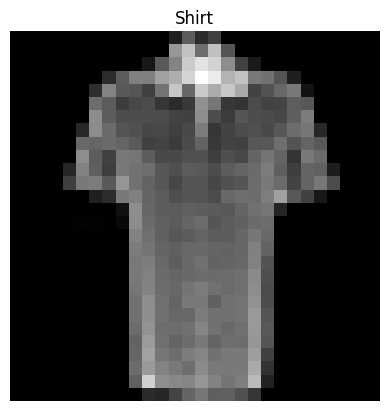

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0, the baseline

Best practice to start with a baseline model, which then will be improved upon with subsequent models/experiements -> start simply, and add complexity when necessary

In [16]:
# Create flatten layer - flattening a contiguous range of dims into a tensor
flatten_model = nn.Flatten()

# Get single sample
x = train_features_batch[0]

# Flatten sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [18]:
torch.manual_seed(42)

# Set up model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # 28 * 28
                              output_shape=len(class_names),
                              hidden_units=10
                            ).to("cpu")

model_0, model_0.state_dict()

(FashionMNISTModelV0(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 OrderedDict([('layer_stack.1.weight',
               tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                       [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                       [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                       ...,
                       [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                       [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                       [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
              ('layer_stack.1.bias',
               tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                        0.0018,  0.0163])),
              ('l

In [19]:
model_0.eval()
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Set up loss, optimizer, and evaluation metrics

* `nn.CrossEntropyLoss()` because multi-class data
* `torch.optim.SGD()`
* Accuracy can be our evaluation metric

In [20]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

from torchmetrics import Accuracy
# from pathlib import Path
# import requests

acc_fn = Accuracy(task='multiclass', num_classes=len(class_names))

# if Path("helper_functions.py").is_file():
#     print("helper_functions.py already exists, skipping download")
# else:
#     print("Downloading helper_functions.py")
#     request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
#     with open("helper_functions.py", "wb") as f:
#         f.write(request.content)

### 3.2 Creating a function to time the experiments

Two of the main things to track:

* Model performance (loss, accuracy, etc.)
* How fast it runs

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    '''Prints difference between start and end time'''
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:
start_time = timer()
# ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.3499986380338669e-05

### 3.3 Creating a training loop and training on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the training loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the testing loss **per batch**.

In [24]:
# import tqdm for progress bar
%pip install tqdm

from tqdm.auto import tqdm

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Set seed and start the timer
torch.manual_seed(42)
train_time_on_cpu = timer()

# Set number of epochs (small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0

    # Add a loop to loop through the training batch
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # Forward pass
        y_pred = model_0(X)

        # Loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate training loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    
    # Divide total training loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test)

            # Loss
            test_loss += loss_fn(test_pred, y_test)

            # Accuracy
            test_acc += acc_fn(test_pred.argmax(dim=1), y_test)

        # Calculate avg. test loss per batch
        test_loss /= len(test_dataloader)

        # Calculate test accuracy avg. per batch
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


# Calculate training time
train_time_end_on_cpu = timer()
print_train_time(train_time_on_cpu, train_time_end_on_cpu, str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:04<00:08,  4.16s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 0.8204
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:08<00:04,  4.04s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 0.8320
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:12<00:00,  4.05s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 0.8343
Train time on cpu: 12.143 seconds


12.143225600011647

## 4. Make precdictions and get Model 0 results

In [31]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: Accuracy):
    '''Returns a dictionary containing the results of the model predicting on data_loader.'''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += acc_fn(y_pred.argmax(dim=1), y)

        # Scale the loss and acc to find the average per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # works only if model was created from a class
        "model_loss": loss.item(),
        "model_acc": acc.item()}

# Calculate model 0 results on test dataset
model_name, model_loss, model_acc = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, acc_fn=acc_fn).values()

model_name, model_loss, model_acc

100%|██████████| 313/313 [00:00<00:00, 601.58it/s]


('FashionMNISTModelV0', 0.47663894295692444, 0.8342651724815369)

## 5. Set up device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"